# EL método del codo y el factor de la silueta del clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
x1 = np.array([3,1,1,2,1,6,6,6,5,6,7,8,9,8,9,9,8])
x2 = np.array([5,4,5,6,5,8,6,7,6,7,1,2,1,2,3,2,3])
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)

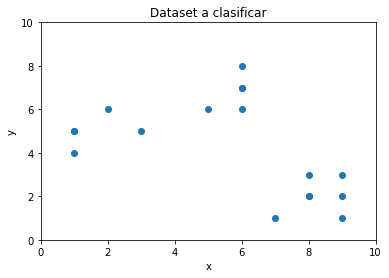

In [3]:
plt.plot()
plt.xlim([0,10])
plt.ylim([0,10])
plt.title("Dataset a clasificar")
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(x1, x2)
plt.show()

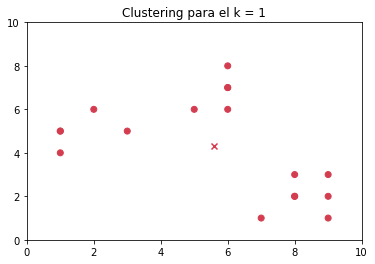

* Para k =  2 el promedio de la silueta es de : 0.6113424368705715
 - Para i =  1  la silueta del cluster vale:  0.49704450958269375
 - Para i =  2  la silueta del cluster vale:  0.7746251901389686


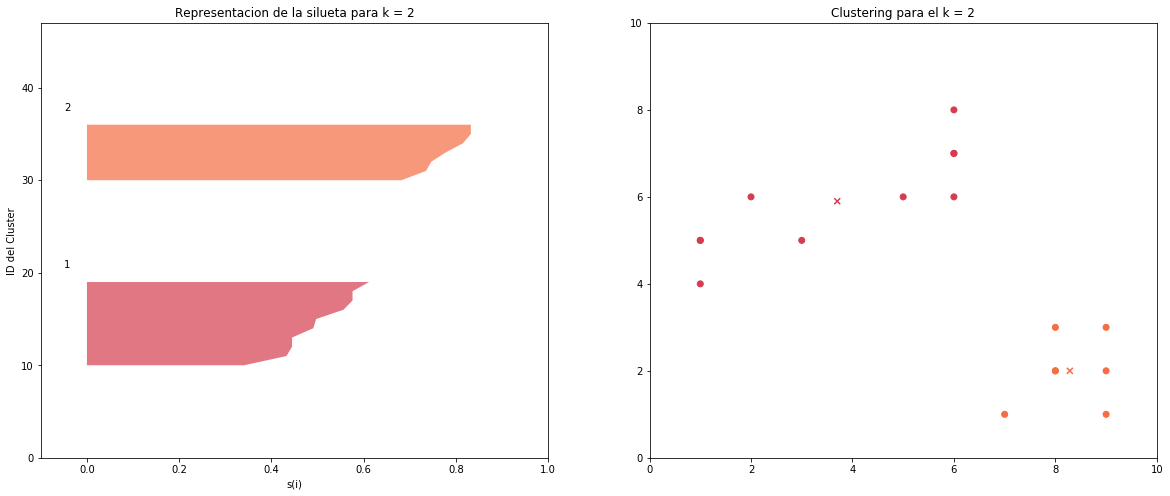

* Para k =  3 el promedio de la silueta es de : 0.7122079383287169
 - Para i =  1  la silueta del cluster vale:  0.7322200728725188
 - Para i =  2  la silueta del cluster vale:  0.7345257364682265
 - Para i =  3  la silueta del cluster vale:  0.6609508863896014


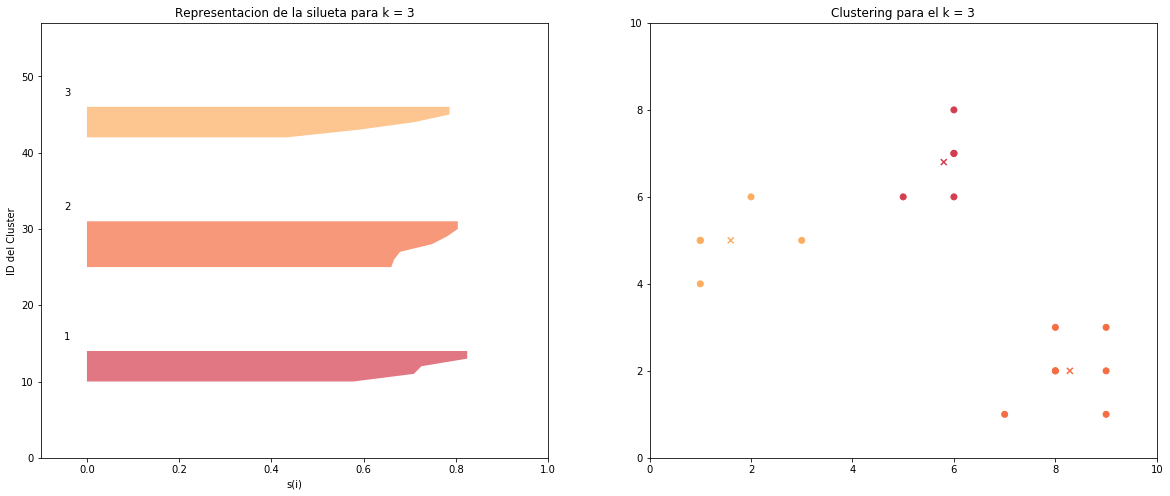

* Para k =  4 el promedio de la silueta es de : 0.6389948643127632
 - Para i =  1  la silueta del cluster vale:  0.7345257364682265
 - Para i =  2  la silueta del cluster vale:  0.24096929517637128
 - Para i =  3  la silueta del cluster vale:  0.654458796162702
 - Para i =  4  la silueta del cluster vale:  0.655666655624379


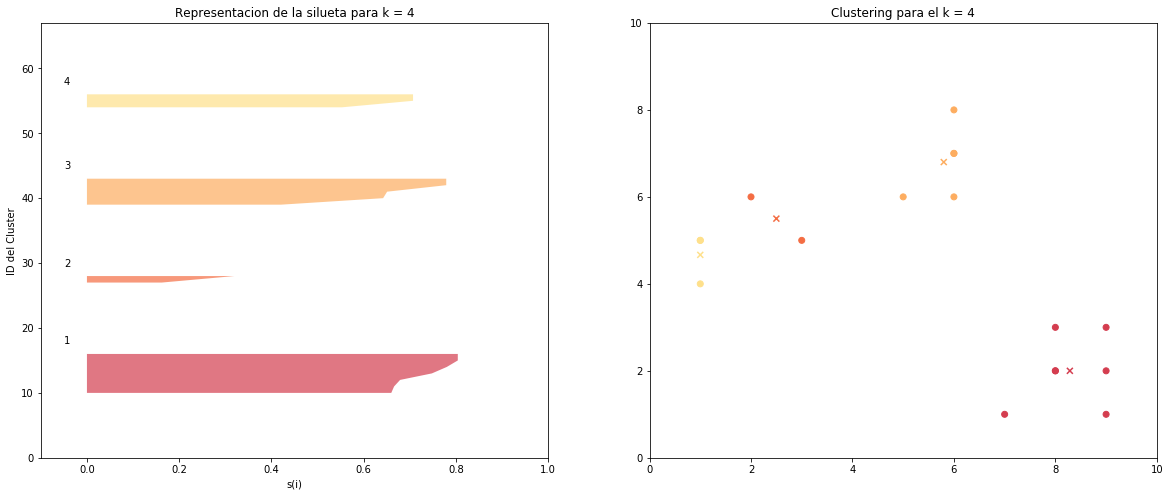

* Para k =  5 el promedio de la silueta es de : 0.42883912423017356
 - Para i =  1  la silueta del cluster vale:  0.655666655624379
 - Para i =  2  la silueta del cluster vale:  0.2698039021743969
 - Para i =  3  la silueta del cluster vale:  0.654458796162702
 - Para i =  4  la silueta del cluster vale:  0.1899052168375926
 - Para i =  5  la silueta del cluster vale:  0.24096929517637128


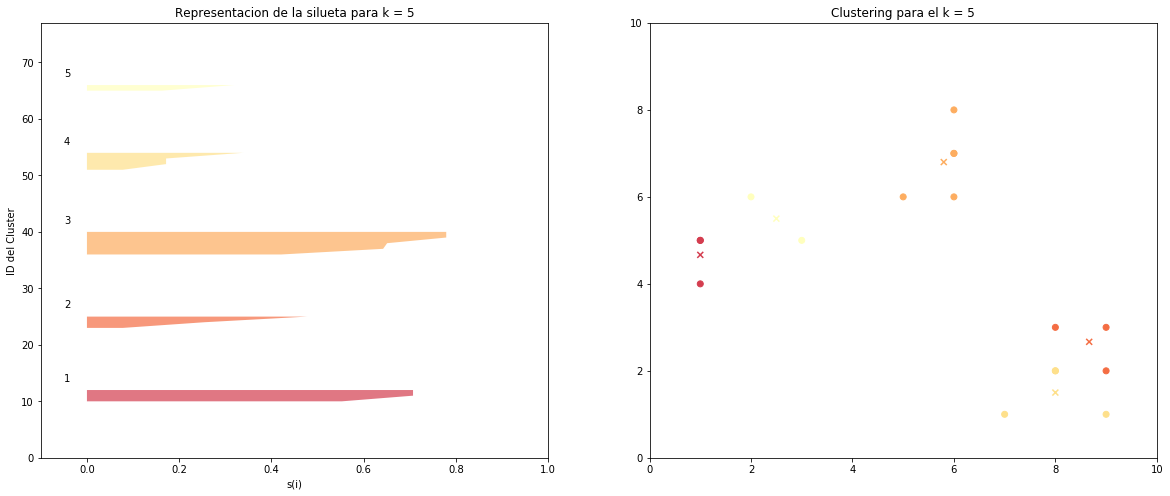

* Para k =  6 el promedio de la silueta es de : 0.4159974962395202
 - Para i =  1  la silueta del cluster vale:  0.655666655624379
 - Para i =  2  la silueta del cluster vale:  0.37765685097302226
 - Para i =  3  la silueta del cluster vale:  0.5664789734180768
 - Para i =  4  la silueta del cluster vale:  0.0
 - Para i =  5  la silueta del cluster vale:  0.24096929517637128
 - Para i =  6  la silueta del cluster vale:  0.32882042637679976


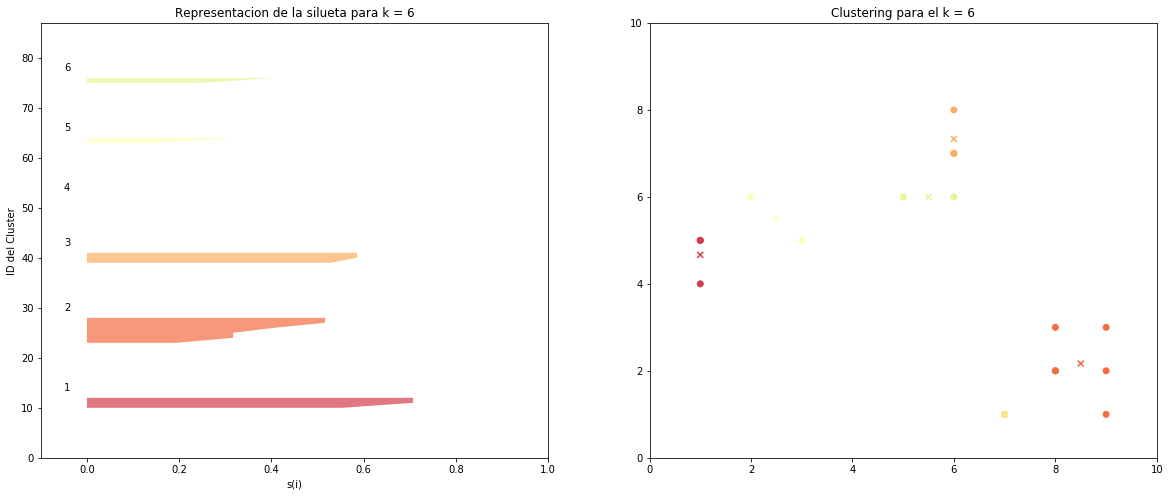

* Para k =  7 el promedio de la silueta es de : 0.3800485694524957
 - Para i =  1  la silueta del cluster vale:  0.027847735322324364
 - Para i =  2  la silueta del cluster vale:  0.24096929517637128
 - Para i =  3  la silueta del cluster vale:  0.5664789734180768
 - Para i =  4  la silueta del cluster vale:  0.655666655624379
 - Para i =  5  la silueta del cluster vale:  0.0
 - Para i =  6  la silueta del cluster vale:  0.5237553814972481
 - Para i =  7  la silueta del cluster vale:  0.32882042637679976


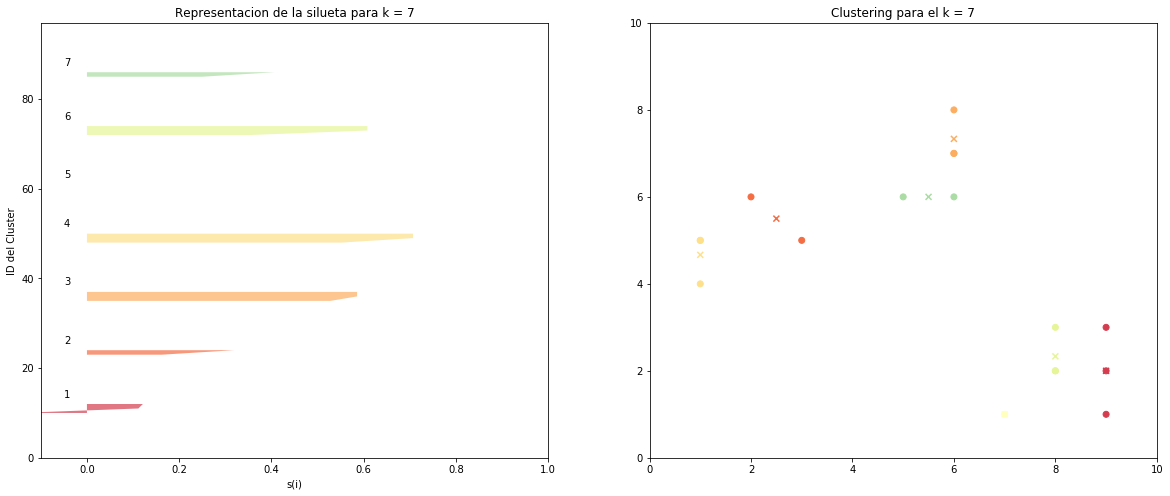

* Para k =  8 el promedio de la silueta es de : 0.3445627498105907
 - Para i =  1  la silueta del cluster vale:  0.0
 - Para i =  2  la silueta del cluster vale:  0.5237553814972481
 - Para i =  3  la silueta del cluster vale:  0.5664789734180768
 - Para i =  4  la silueta del cluster vale:  0.6152265411044983
 - Para i =  5  la silueta del cluster vale:  0.0
 - Para i =  6  la silueta del cluster vale:  0.32882042637679976
 - Para i =  7  la silueta del cluster vale:  0.027847735322324364
 - Para i =  8  la silueta del cluster vale:  0.0


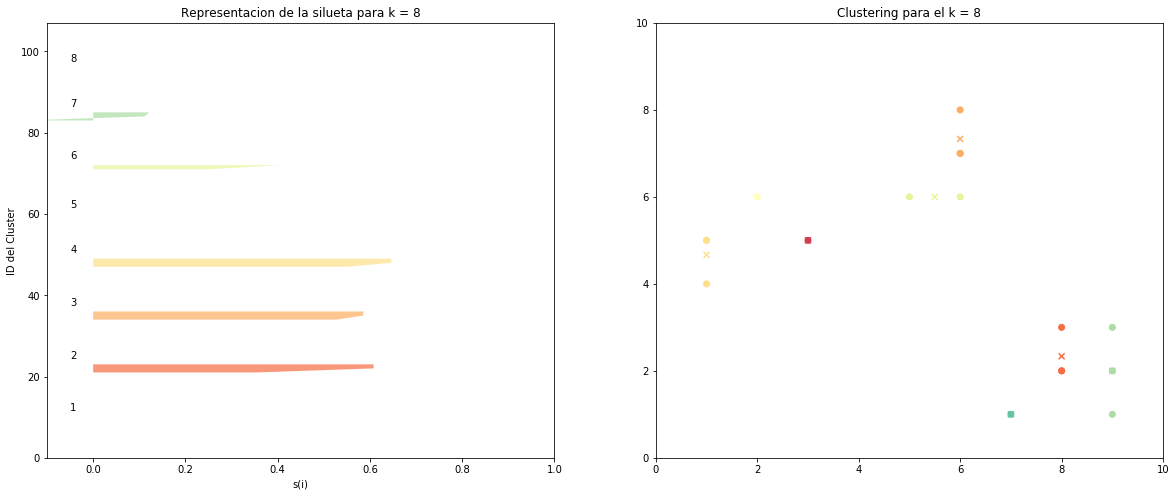

* Para k =  9 el promedio de la silueta es de : 0.34011594848992555
 - Para i =  1  la silueta del cluster vale:  0.20382042637679978
 - Para i =  2  la silueta del cluster vale:  0.0
 - Para i =  3  la silueta del cluster vale:  0.5664789734180768
 - Para i =  4  la silueta del cluster vale:  0.39052429175126996
 - Para i =  5  la silueta del cluster vale:  0.6152265411044983
 - Para i =  6  la silueta del cluster vale:  0.32882042637679976
 - Para i =  7  la silueta del cluster vale:  0.0
 - Para i =  8  la silueta del cluster vale:  0.0
 - Para i =  9  la silueta del cluster vale:  0.0


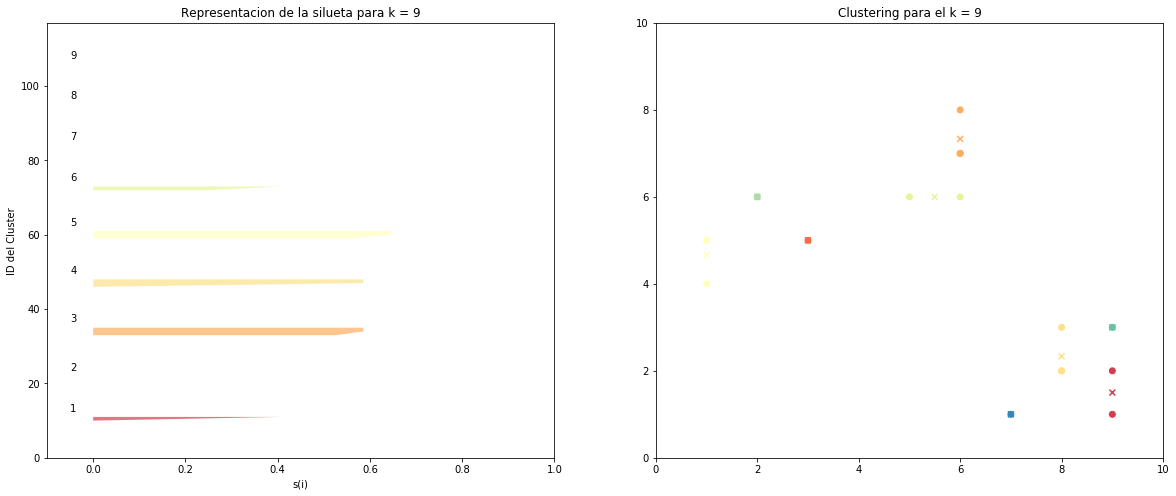

In [4]:
max_k = 10 #máximo número de cluster que vamos a crear
K = range(1, max_k)
ssw =[] #crea un array vacio que es donde meteremos la suma de los cuadrados internos 
color_palette = [plt.cm.Spectral(float(i)/max_k) for i in K]#da diferentes colores al gráfico
centroid = [sum(X)/len(X) for i in K] #creamos un centroide
sst = sum(np.min(cdist(X, centroid, "euclidean"), axis = 1)) #Definición de los totales de los cuadrados  por filas

for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    
    centers = pd.DataFrame(kmeanModel.cluster_centers_)
    labels = kmeanModel.labels_
    
    ssw_k = sum(np.min(cdist(X, kmeanModel.cluster_centers_, "euclidean"), axis = 1))
    ssw.append(ssw_k)
    
    label_color = [color_palette[i] for i in labels]
    
    ###Fabricamos una silueta para cada cluster####
    ##Cuando K = 1 no hay silueta posible o si son clusters individuales
    
    ##por seguridad no hacemos silueta si K=1 o k=len(X)
    
    if 1<k<len(X):
        #Crear un subplot de una fila y dos columnas
        fig, (axis1, axis2) = plt.subplots(1,2)
        fig.set_size_inches(20,8)
        
        #El primer subplot tendrá valores desde -1 a 1
        #En nuestro caso están en valores entre -0.1 y 1
        axis1.set_xlim([-0.1, 1.0])
        #El número de cluster a instertar determinará el tamaño de cada barra
        #El coeficiende del (nº de clusters + 1)*10 será el espacio en blanco que dejaremos
        #entre siluetas individuales de cada cluster para separarlas
        axis1.set_ylim( 0, len(X)+ (k+1)*10)
        
        silhouette_avg = silhouette_score(X, labels)
        print("* Para k = ",k, "el promedio de la silueta es de :",silhouette_avg)
        sample_silhouette_values = silhouette_samples(X, labels)
        
        y_lower = 10
        for i in range(k):
            #Agregamos la silueta del cluster k
            ith_cluster_sv = sample_silhouette_values[labels == i] #Valores del cluster iésimo
            print(" - Para i = ",i+1, " la silueta del cluster vale: ",np.mean(ith_cluster_sv))
            
            #Ordenamos descententemente las siluetas del cluster i-ésimo
            ith_cluster_sv.sort()
            
            #Calculamos donde colocar la primera silueta en el eje vertical
            ith_cluster_size = ith_cluster_sv.shape[0]
            y_upper = y_lower + ith_cluster_size
            
            #Elegimos el color del cluster
            color = color_palette[i]
            
            #Pintamos la silueta del cluster i-esimo
            axis1.fill_betweenx(np.arange(y_lower, y_upper),
                               0, ith_cluster_sv, facecolor = color,alpha = 0.7)
            
            
            #Etiquetamos dicho cluster con el número en el centro
            axis1.text(-0.05, y_lower + 0.5 + ith_cluster_size, str(i+1))
            
            #Calculamos el nuevo y_lower para el siguiente cluster en el centro
            y_lower = y_upper + 10 #dejamos acias 10 posiciones sin muestra
            
        axis1.set_title("Representacion de la silueta para k = %s"%str(k))
        axis1.set_xlabel("s(i)")
        axis1.set_ylabel("ID del Cluster")
        
        #Fin de la representación de la silueta
        
    ##Plot de los k.means con los puntos respectivos
    plt.plot()
    plt.xlim([0,10])
    plt.ylim([0,10])
    plt.title("Clustering para el k = %s"%str(k))
    plt.scatter(x1,x2, c = label_color)
    plt.scatter(centers[0], centers[1], c = color_palette[0:k], marker = "x")
    plt.show()
    

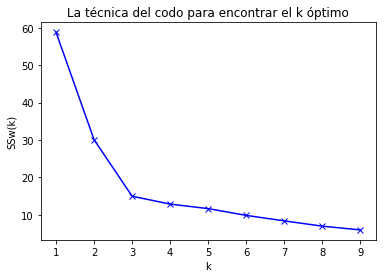

In [5]:
#Representación del codo
plt.plot(K, ssw, "bx-")
plt.xlabel("k")
plt.ylabel("SSw(k)")
plt.title("La técnica del codo para encontrar el k óptimo")
plt.show()

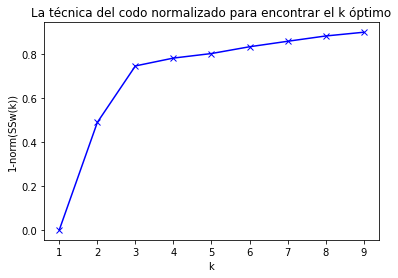

In [6]:
#Representación del codo normalizado
plt.plot(K, 1-ssw/sst, "bx-")
plt.xlabel("k")
plt.ylabel("1-norm(SSw(k))")
plt.title("La técnica del codo normalizado para encontrar el k óptimo")
plt.show()